<span style="color: green; font-size: 40px; font-weight: bold;">Projeto 1 com Feedback</span>

<br> <br>

# Análise de Dados de Incidentes de Trânsito em Londres

<br>

### Contexto

Neste projeto, vamos explorar um cenário relevante para a segurança no trânsito: a análise de dados de incidentes de trânsito em Londres. O objetivo é responder a perguntas sobre a frequência e características dos incidentes de trânsito, como a faixa etária mais envolvida, os tipos mais comuns de eventos, e as vítimas mais frequentes. Utilizaremos dados reais disponíveis publicamente para realizar essa análise, que será feita através de gráficos e storytelling.

<br>

### Objetivo
O objetivo deste projeto é analisar dados sobre incidentes de trânsito em Londres para responder a perguntas específicas sobre a frequência de incidentes, a faixa etária mais envolvida, e os tipos de eventos mais comuns. Utilizaremos visualizações para comunicar os insights obtidos a partir dos dados.

<br>

### Perguntas de Negócio Principais

<br>

- **1)** Qual a quantidade de incidentes por gênero?
<br>

- **2)** Qual faixa etária esteve mais envolvida nos incidentes?
<br>

- **3)** Qual o percentual de incidentes por tipo de evento (Incident Event Type)?
<br>

- **4)** Como foi a evolução de incidentes por mês ao longo do tempo?
<br>

- **5)** Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?
<br>

- **6)** Qual foi a média de incidentes por mês envolvendo crianças (Child)?
<br>

- **7)** Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?
<br>

- **8)** No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?
<br>

- **9)** Considerando o Operador, qual a distribuição de incidentes ao longo do tempo?
<br>

- **10** Qual o tipo de incidente mais comum com ciclistas?

<br>

### Entregável

O entregável deste projeto será um relatório de análise de dados, incluindo gráficos e insights que respondem às perguntas de negócio listadas. O trabalho não inclui a construção de modelos de Machine Learning, mas sim a aplicação de habilidades de análise de dados para responder às perguntas de negócio através de visualizações e storytelling.

<br>

### Sobre o Conjunto de Dados

O conjunto de dados contém informações sobre incidentes de trânsito na cidade de Londres, com detalhes como a data do incidente, a rota, o operador, a descrição do resultado de ferimentos, o tipo de evento, a categoria da vítima, o sexo da vítima e a faixa etária da vítima.

<br> <table border="2"> <tr> <th style="text-align: center; font-size: 16px;">Nome da Coluna</th> <th style="text-align: center; font-size: 16px;">Tipo de Dado</th> <th style="text-align: center; font-size: 16px;">Descrição</th> </tr> <tr> <td>year</td> <td>int64</td> <td>Ano do incidente.</td> </tr> <tr> <td>date_of_incident</td> <td>object</td> <td>Data do incidente.</td> </tr> <tr> <td>route</td> <td>object</td> <td>Rota do ônibus.</td> </tr> <tr> <td>operator</td> <td>object</td> <td>Operador do ônibus.</td> </tr> <tr> <td>group_name</td> <td>object</td> <td>Nome do grupo de ônibus.</td> </tr> <tr> <td>bus_garage</td> <td>object</td> <td>Garagem do ônibus.</td> </tr> <tr> <td>borough</td> <td>object</td> <td>Bairro onde o incidente ocorreu.</td> </tr> <tr> <td>injury_result_description</td> <td>object</td> <td>Descrição do resultado de ferimentos.</td> </tr> <tr> <td>incident_event_type</td> <td>object</td> <td>Tipo de evento do incidente.</td> </tr> <tr> <td>victim_category</td> <td>object</td> <td>Categoria da vítima (ex: Passageiro, Pedestre).</td> </tr> <tr> <td>victims_sex</td> <td>object</td> <td>Sexo da vítima.</td> </tr> <tr> <td>victims_age</td> <td>object</td> <td>Faixa etária da vítima.</td> </tr> </table>

<br><br><br>


# Importando Pacotes

In [ ]:
# Imports

import numpy as pd
import pandas as pd
import seaborn as sns                 # Visualização de dados estatísticos
from matplotlib import pyplot as plt  # Criação de gráficos e visualizações

<br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Carregando os Dados</span>

<br>

In [38]:
# Carrega os dados
dados = pd.read_csv('dados/data.csv')

In [39]:
display(dados.head(5))

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;"> Análise Exploratória Inicial dos Dados </span>

<br>

### Criação de Função Para Análise Inicial

In [40]:
import re

def funcao_analise_inicial(df):
    # Configurar Pandas para exibir todas as linhas
    pd.set_option('display.max_rows', None)

    # Informações do DataFrame
    print('\n\n INFO \n\n')
    df.info()
    print('\n\n ------------------------------------------------------------------------------------------ \n\n')

    # Verifica se há valores ausentes e duplicados
    valores_ausentes = df.isna().sum().sum() > 0
    valores_duplicados = df.duplicated().sum() > 0

    # Nomes das variáveis com valores ausentes
    variaveis_ausentes = df.columns[df.isna().any()].tolist()

    # Número de linhas duplicadas
    num_linhas_duplicadas = df.duplicated().sum()

    # Porcentagem de linhas duplicadas
    porcentagem_linhas_duplicadas = (num_linhas_duplicadas / len(df)) * 100

    # Exibe o resultado sobre valores ausentes e duplicados
    print("\n\nExistem valores ausentes:", valores_ausentes)
    if valores_ausentes:
        print("\nVariáveis com valores ausentes:", variaveis_ausentes)
    else:
        print("\nNenhuma variável possui valores ausentes.")

    print("\n\nExistem valores duplicados:", valores_duplicados)
    if valores_duplicados:
        print("\nNúmero de Linhas Duplicadas:", num_linhas_duplicadas)
        print("\nPorcentagem de Linhas Duplicadas: {:.2f}%".format(porcentagem_linhas_duplicadas))
    else:
        print("\nNenhuma variável possui valores duplicados.")
    
    # Verificação de caracteres especiais
    caracteres_especiais = re.compile('[@_!#$%^&*<>()?/\\|}{~:]')   # nenhum caracter removido
    colunas_com_caracteres_especiais = {}

    for coluna in df.columns:
        if df[coluna].dtype == 'object':  # Verifica apenas colunas de texto
            contem_caracteres_especiais = df[coluna].apply(lambda x: bool(caracteres_especiais.search(x) if isinstance(x, str) else False)).any()
            if contem_caracteres_especiais:
                indices_com_caracteres_especiais = df[coluna][df[coluna].apply(lambda x: bool(caracteres_especiais.search(x) if isinstance(x, str) else False))].index.tolist()
                colunas_com_caracteres_especiais[coluna] = indices_com_caracteres_especiais

    # Exibe o resultado sobre caracteres especiais
    print("\n\nExistem caracteres especiais nas colunas:", bool(colunas_com_caracteres_especiais))
    if colunas_com_caracteres_especiais:
        print("\nColunas com caracteres especiais e os índices:")
        for coluna, indices in colunas_com_caracteres_especiais.items():
            print(f"\n Coluna [ {coluna} ]: Índices com caracteres especiais {indices}")
    else:
        print("\nNenhuma coluna possui caracteres especiais.")

print('A função foi criada com sucesso.\n\n')

A função foi criada com sucesso.




In [41]:
# Chama a Função Analise inicial
funcao_analise_inicial(dados)



 INFO 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       23158 non-null  int64 
 1   date_of_incident           23158 non-null  object
 2   route                      23158 non-null  object
 3   operator                   23158 non-null  object
 4   group_name                 23158 non-null  object
 5   bus_garage                 23158 non-null  object
 6   borough                    23158 non-null  object
 7   injury_result_description  23158 non-null  object
 8   incident_event_type        23158 non-null  object
 9   victim_category            23158 non-null  object
 10  victims_sex                23158 non-null  object
 11  victims_age                23158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


 --------------------------------------------------------

<br> <br> <br>


# <span style="color: green; font-size: 38px; font-weight: bold;">Analisando as Variáveis</span>

<br>

#### Analisando as Variáveis Categóricas

In [42]:
# Resumo das variáveis categóricas (describe exibe informações para variáveis categóricas somente com filtro)
dados.describe(include=['object'])

,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
count,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158
unique,45,612,25,14,84,35,4,10,17,3,5
top,2017-07-01,OOS,Metroline,Arriva London,Garage Not Available,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
freq,650,321,3457,4945,8572,1571,17336,6981,18828,11847,10754


In [43]:
# Criando loop para listar o value_counts() por categoria de cada variável categórica
cats = ['injury_result_description', 'incident_event_type', 'victim_category', 'victims_sex', 'victims_age']
for col in cats:
    print(f'''\n\nTotal de Registros Por Categoria da Variável {col}:\n''')
    print(dados[col].value_counts())
    print()



Total de Registros Por Categoria da Variável injury_result_description:

Injuries treated on scene                                          17336
Taken to Hospital – Reported Serious Injury or Severity Unknown     2994
Reported Minor Injury - Treated at Hospital                         2786
Fatal                                                                 42
Name: injury_result_description, dtype: int64



Total de Registros Por Categoria da Variável incident_event_type:

Slip Trip Fall             6981
Onboard Injuries           6563
Personal Injury            4596
Collision Incident         4166
Assault                     590
Activity Incident Event     114
Vandalism Hooliganism        73
Safety Critical Failure      66
Fire                          6
Robbery                       3
Name: incident_event_type, dtype: int64



Total de Registros Por Categoria da Variável victim_category:

Passenger                      18828
Pedestrian                      1612
Bus Driver       

<br>

### Analisando por Gráficos

<br>

#### Variável Numérica

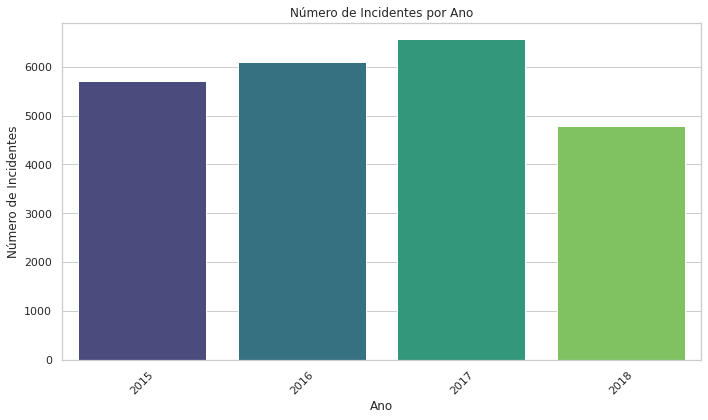

In [44]:
# Contar o número de incidentes por ano
year_counts = dados['year'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Número de Incidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário

# Mostrar o gráfico
plt.tight_layout()
plt.show()

<br>

#### Variáveis Categóricas

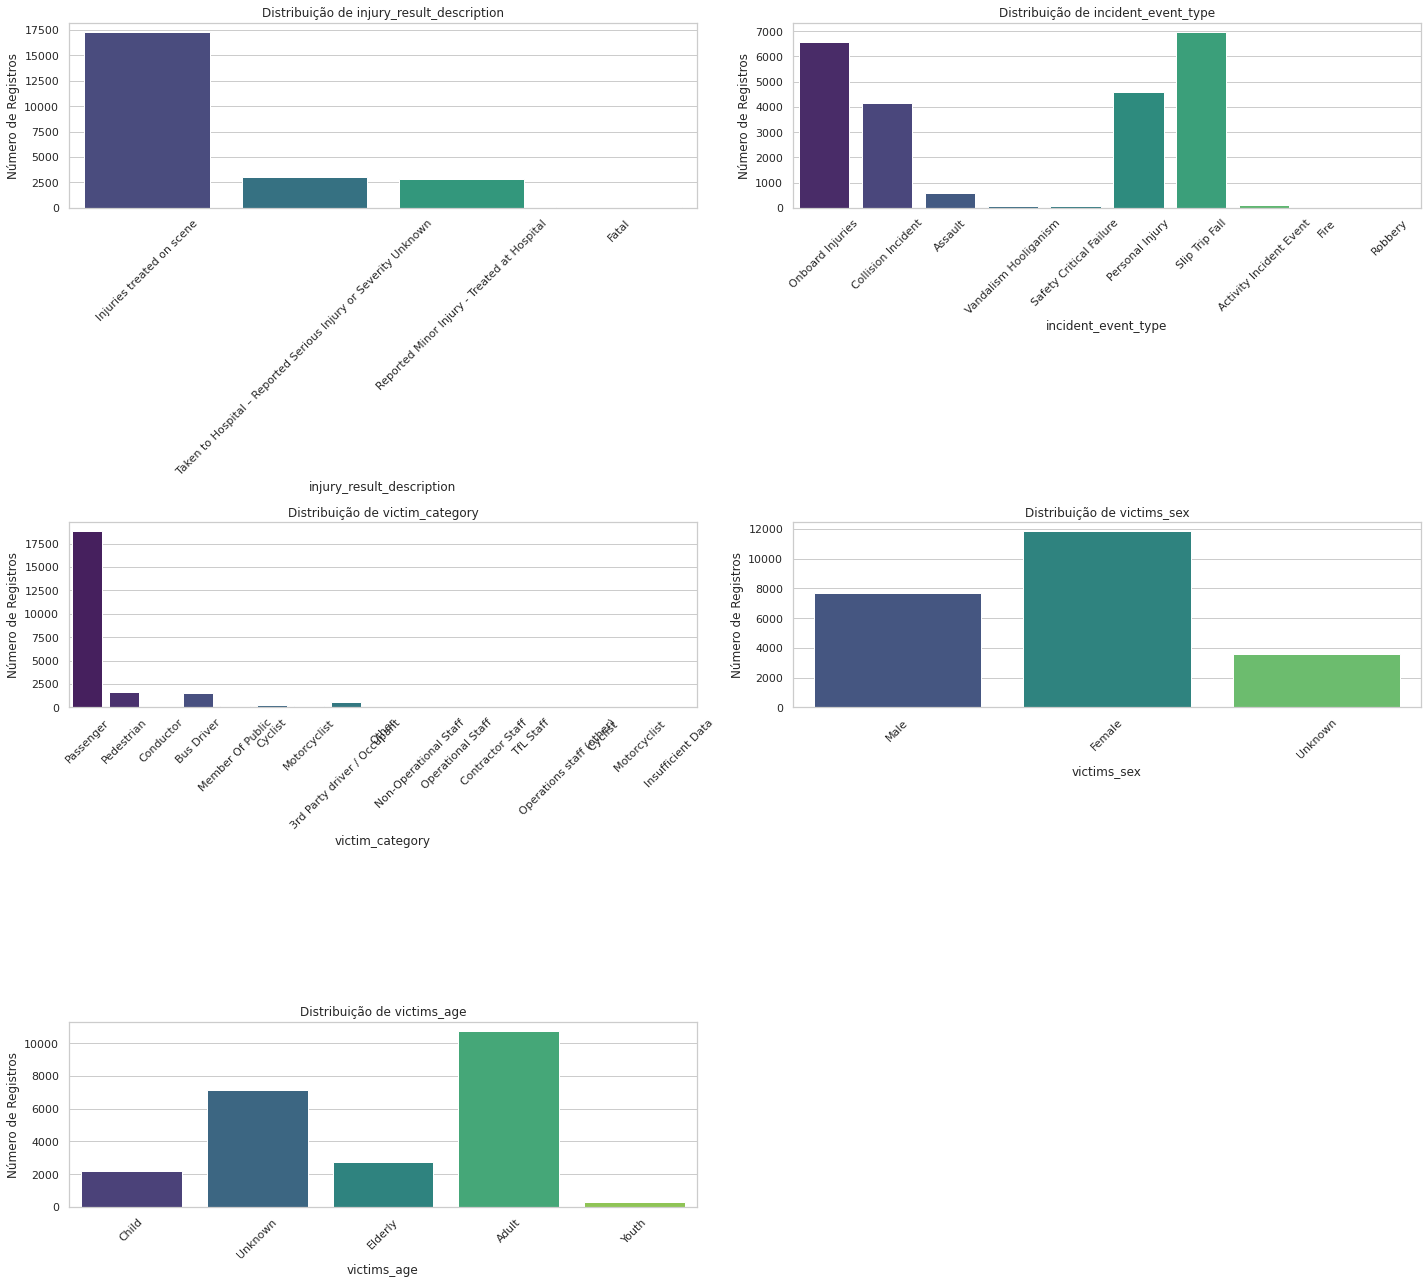

In [45]:
# Lista de variáveis categóricas
cats = ['injury_result_description', 'incident_event_type', 'victim_category', 'victims_sex', 'victims_age']

# Configurar o tamanho da figura
plt.figure(figsize=(20, 18))  # Ajustar o tamanho para acomodar 6 gráficos

# Criar um gráfico de barras para cada variável categórica
for i, col in enumerate(cats):
    plt.subplot(3, 2, i + 1)  # Ajusta o número de linhas e colunas para os gráficos (3x2)
    sns.countplot(data=dados, x=col, palette='viridis')
    
    # Adicionar títulos e rótulos
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Registros')
    plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

<br> <br> <br>


# <span style="color: green; font-size: 38px; font-weight: bold;">Transformação dos Dados</span>

<br>

#### Criar novas variáveis `month_of_incident` e `season_of_incident` 

In [46]:
import pandas as pd

# Certifique-se de que a coluna 'date_of_incident' esteja no formato datetime
dados['date_of_incident'] = pd.to_datetime(dados['date_of_incident'])

# Extrair o mês da data e criar a nova variável 'month_of_incident'
dados['month_of_incident'] = dados['date_of_incident'].dt.month

# Função para determinar a estação do ano a partir do mês
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Criar a nova coluna 'season_of_incident'
dados['season_of_incident'] = dados['month_of_incident'].apply(get_season)

# Reordenar as colunas para que 'season_of_incident' fique entre 'month_of_incident' e 'route'
colunas = ['year', 'date_of_incident', 'month_of_incident', 'season_of_incident', 'route', 'operator', 'group_name', 'bus_garage', 
           'borough', 'injury_result_description', 'incident_event_type', 'victim_category', 'victims_sex', 'victims_age']
dados = dados[colunas]

# Mostrar as primeiras linhas para verificar a alteração
display(dados.head(2))

,year,date_of_incident,month_of_incident,season_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,Winter,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,1,Winter,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown


<br>

### Visualizando Novas Variávels com Gráficos

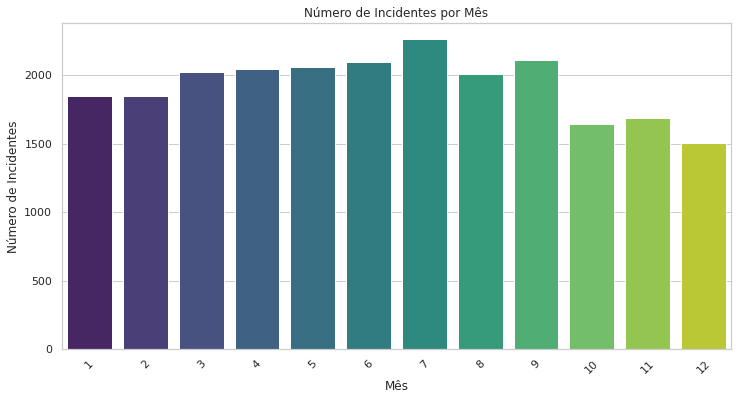

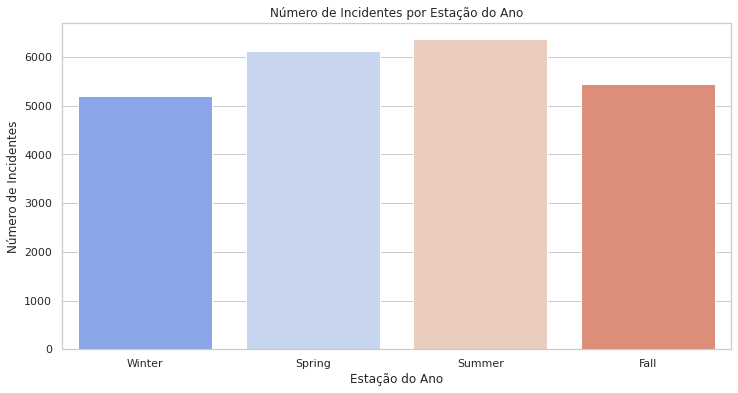

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para os gráficos
sns.set(style="whitegrid")

# Gráfico de barras para 'month_of_incident'
plt.figure(figsize=(12, 6))
sns.countplot(data=dados, x='month_of_incident', palette='viridis')
plt.title('Número de Incidentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

# Gráfico de barras para 'season_of_incident'
plt.figure(figsize=(12, 6))
sns.countplot(data=dados, x='season_of_incident', palette='coolwarm')
plt.title('Número de Incidentes por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Incidentes')
plt.show()

<br> <br> <br>


# <span style="color: green; font-size: 38px; font-weight: bold;">Respondendo Perguntas de Negócio</span>

<br><br>

### 1) Qual a quantidade de incidentes por gênero?

<br>

In [48]:
# Visualizando por Números
incidentes_por_genero = dados['victims_sex'].value_counts()
incidentes_por_genero

Female     11847
Male        7709
Unknown     3602
Name: victims_sex, dtype: int64

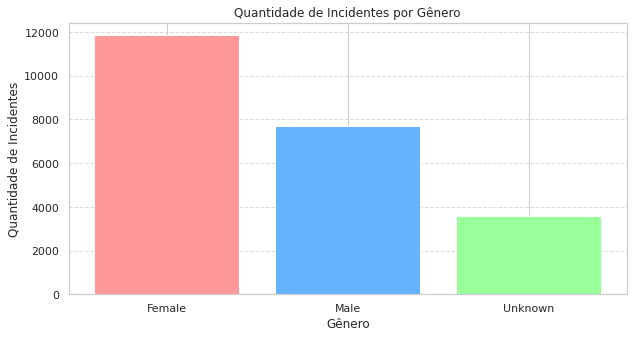

In [50]:
# Visualizando por Gráfico (gráfico de barras para gênero)
plt.figure(figsize=(10, 5))
plt.bar(incidentes_por_genero.index, incidentes_por_genero.values, color=['#FF9999', '#66B3FF', '#99FF99'])
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Incidentes')
plt.title('Quantidade de Incidentes por Gênero')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Resposta

- Feminino: **11847** casos.
- Masculino: **7709** casos.
- Desconhecido: **3602** casos.

<br><br>

### 2) Qual faixa etária esteve mais envolvida nos incidentes?

<br>

In [49]:
# Visualizando por Números
incidentes_por_faixa_etaria = dados['victims_age'].value_counts()
incidentes_por_faixa_etaria

Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: victims_age, dtype: int64

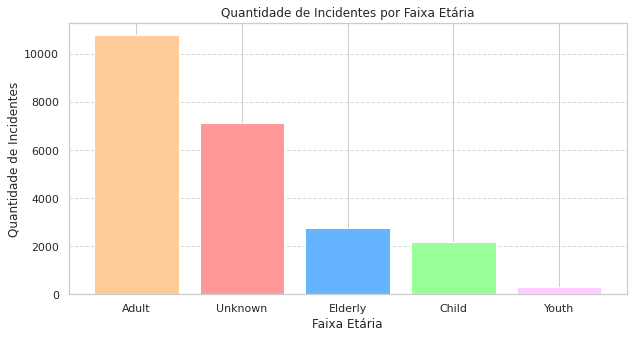

In [51]:
# Visualizando por Gráfico (gráfico de barras para faixa etária)
plt.figure(figsize=(10, 5))
plt.bar(incidentes_por_faixa_etaria.index, incidentes_por_faixa_etaria.values, color=['#FFCC99', '#FF9999', '#66B3FF', '#99FF99', '#FFCCFF'])
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Incidentes')
plt.title('Quantidade de Incidentes por Faixa Etária')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Resposta

- Idoso: **2769** casos.
- Adulto: **10754** casos.
- Jovem: **319** casos.
- Criança: **2181** casos.
- Desconhecido: **7135** casos.

<br><br>

### 3) Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

<br>

In [52]:
# Visualizando por Números
percentual_de_incidentes = dados['incident_event_type'].value_counts(normalize=True) * 100
percentual_de_incidentes

Slip Trip Fall             30.145090
Onboard Injuries           28.340098
Personal Injury            19.846273
Collision Incident         17.989464
Assault                     2.547716
Activity Incident Event     0.492270
Vandalism Hooliganism       0.315226
Safety Critical Failure     0.284999
Fire                        0.025909
Robbery                     0.012954
Name: incident_event_type, dtype: float64

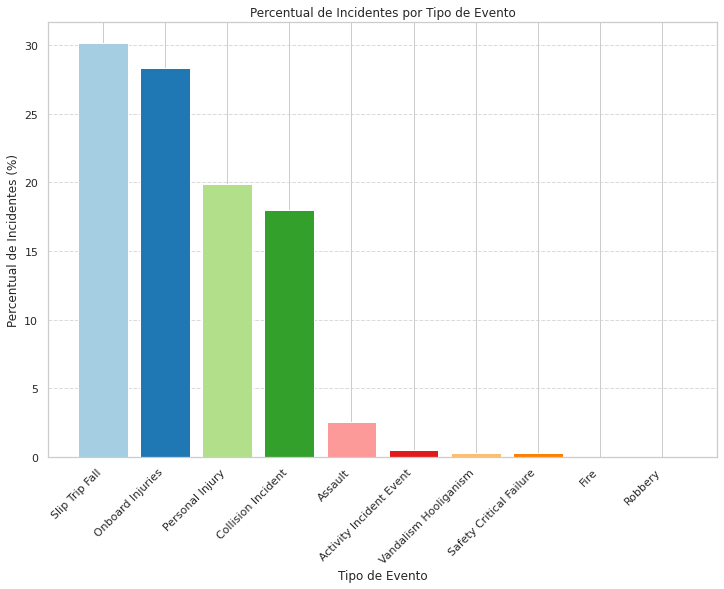

In [54]:
# Visualizando por Gráfico (gráfico de barras)
plt.figure(figsize=(12, 8))
plt.bar(percentual_de_incidentes.index, percentual_de_incidentes.values, color=plt.cm.Paired(range(len(percentual_de_incidentes))))
plt.xlabel('Tipo de Evento')
plt.ylabel('Percentual de Incidentes (%)')
plt.title('Percentual de Incidentes por Tipo de Evento')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Resposta

- Slip Trip Fall: 30.15%
- Onboard Injuries: 28.34%
- Personal Injury: 19.85%
- Collision Incident: 17.99%
- Assault: 2.55%
- Activity Incident Event: 0.49%
- Vandalism Hooliganism: 0.32%
- Safety Critical Failure: 0.28%
- Fire: 0.03%
- Robbery: 0.01%

<br><br>

### 4) Como foi a evolução de incidentes por mês ao longo do tempo?

<br>

In [67]:
# Visualizando por tabela (contagem de incidentes por mês e ano)
incidentes_por_mes_e_ano = dados.groupby(['year', 'month_of_incident']).size().unstack(fill_value=0)
incidentes_por_mes_e_ano

month_of_incident,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,399,371,460,470,472,564,558,446,487,470,495,523
2016,466,484,449,504,494,460,507,513,582,551,612,471
2017,435,487,579,563,510,516,650,563,549,621,584,516
2018,547,507,535,507,589,557,553,491,491,0,0,0


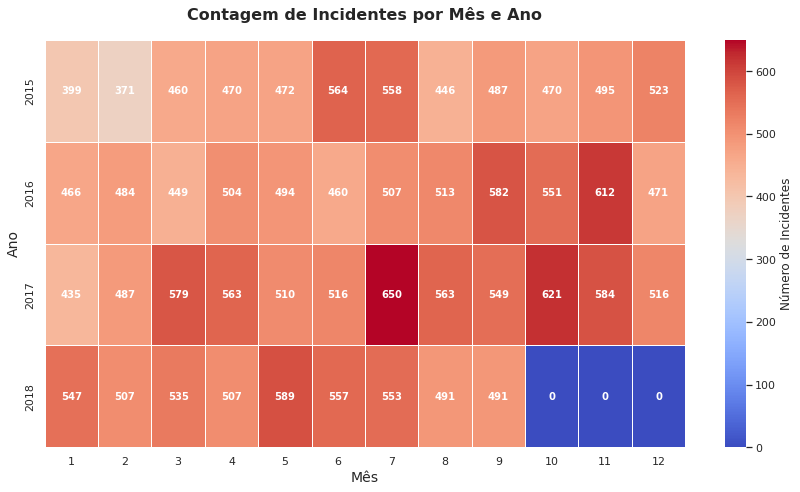

In [73]:
# Visulizando por gŕafico (gráfico de calor)

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 7))

# Ajustar o estilo geral do gráfico
sns.set_style("whitegrid")

# Criar o gráfico de calor com todos os números em branco
sns.heatmap(incidentes_por_mes_e_ano, annot=True, fmt="d", cmap="coolwarm", linewidths=.8, linecolor='white', 
            cbar_kws={'label': 'Número de Incidentes'}, annot_kws={"size": 10, "weight": "bold", "color": "white"})

# Ajustar títulos e rótulos com tamanho e estilo de fonte
plt.title('Contagem de Incidentes por Mês e Ano', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Ano', fontsize=14)

# Melhorar o espaçamento
plt.tight_layout()

plt.show()

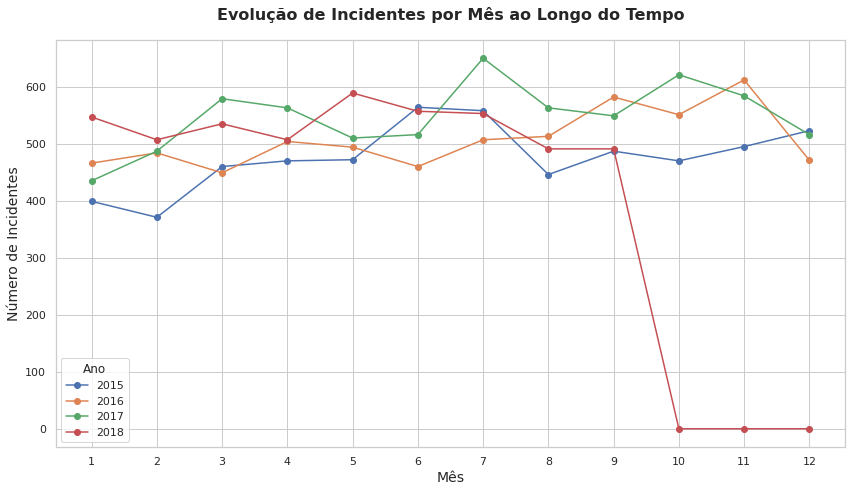

In [72]:
# Criando o gráfico de linhas com os incidentes por mês e ano
plt.figure(figsize=(12, 7))

# Para cada ano, plota uma linha com os dados de incidentes por mês
for year in incidentes_por_mes_e_ano.index:
    plt.plot(incidentes_por_mes_e_ano.columns, incidentes_por_mes_e_ano.loc[year], marker='o', label=year)

# Configurações estéticas do gráfico
plt.title('Evolução de Incidentes por Mês ao Longo do Tempo', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Incidentes', fontsize=14)
plt.legend(title='Ano')
plt.xticks(ticks=range(1, 13))  # Definir os meses corretamente no eixo x

# Melhorar o espaçamento
plt.tight_layout()

# Mostrar o gráfico
plt.show()

#### Resposta

- A evolução dos incidentes ao longo dos anos analisados demonstra uma tendência estável, com exceções notáveis que devem ser investigadas. O pico de julho de 2017 se destaca como um evento único e relevante, exigindo atenção especial para identificar suas causas. A ausência de dados no final de 2018 não compromete a análise, mas deve ser tratada como uma anomalia de coleta de dados. A capacidade de antecipar e gerenciar variações mensais e sazonais dos incidentes permitirá uma abordagem mais eficaz na mitigação de riscos futuros, garantindo maior controle e previsibilidade em operações.

<br><br>

### 5) Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

<br>

In [77]:
collision_incidents_female = dados[(dados['incident_event_type'] == 'Collision Incident') & (dados['victims_sex'] == 'Female')]
collision_incidents_female_count_by_month = collision_incidents_female['month_of_incident'].value_counts().sort_index()
collision_incidents_female_count_by_month

1     137
2     116
3     129
4     147
5     123
6     150
7     147
8     122
9     158
10    113
11    140
12     76
Name: month_of_incident, dtype: int64

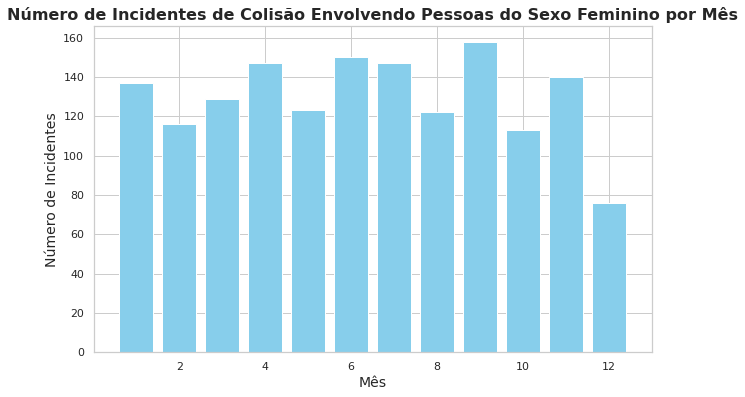

In [79]:
# Visualizando por Gráfico (gráfico de barras)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(collision_incidents_female_count_by_month.index, collision_incidents_female_count_by_month.values, color='skyblue')

# Adicionar título e rótulos
plt.title('Número de Incidentes de Colisão Envolvendo Pessoas do Sexo Feminino por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Incidentes', fontsize=14)

# Exibir o gráfico
plt.show()

#### Resposta

- Mês 9 com 158 incidentes.

<br><br>

### 6) Qual foi a média de incidentes por mês envolvendo crianças (Child)?

<br>

In [89]:
# Visualizando por Números
qtd_incidentes_criancas_mes = dados[dados['victims_age'] == 'Child'].groupby('month_of_incident').size()
print(qtd_incidentes_criancas_mes)

media_incidentes_criancas = qtd_incidentes_criancas_mes.mean()
print('\nMédia: ', media_incidentes_criancas)

month_of_incident
1     126
2     146
3     190
4     226
5     206
6     245
7     232
8     208
9     225
10    150
11    120
12    107
dtype: int64

Média:  181.75


#### Resposta

- Média de 181 acidentes por mês envolvendo crianças.

<br><br>

### 7) Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

<br>

In [90]:
dados.head(2)

,year,date_of_incident,month_of_incident,season_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,Winter,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,1,Winter,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown


In [96]:
# Visualizando por Números
fem = dados[(dados['injury_result_description'] == 'Injuries treated on scene') & (dados['victims_sex'] == 'Female')].shape[0]
print('Feminino: ', fem)

masc = dados[(dados['injury_result_description'] == 'Injuries treated on scene') & (dados['victims_sex'] == 'Male')].shape[0]
print('\nMasculino: ', masc)

Feminino:  8816

Masculino:  5632


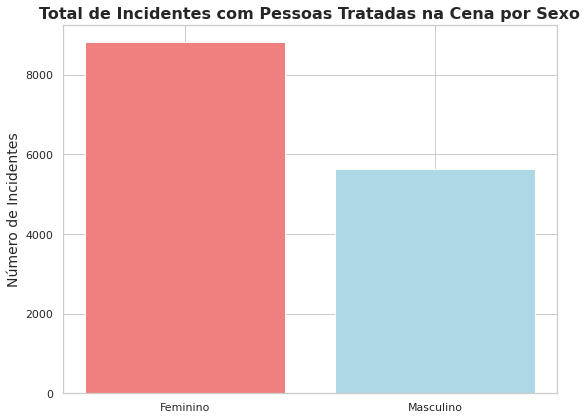

In [97]:
# Visulizar por Gráfico (gráfico de barras)

# Dados para o gráfico
sex_labels = ['Feminino', 'Masculino']
incident_counts = [fem, masc]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(sex_labels, incident_counts, color=['lightcoral', 'lightblue'])

# Adicionar título e rótulos
plt.title('Total de Incidentes com Pessoas Tratadas na Cena por Sexo', fontsize=16, fontweight='bold')
plt.ylabel('Número de Incidentes', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

#### Resposta

- Feminino:  8816
- Masculino:  5632

<br><br>

### 8) No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

<br>

In [104]:
# Visualizando por Números

incident = dados[(dados['victims_age'] == 'Elderly') & (dados['year'] == 2017)].groupby('month_of_incident').size()
incident

month_of_incident
1     66
2     53
3     77
4     75
5     69
6     65
7     81
8     70
9     78
10    69
11    68
12    67
dtype: int64

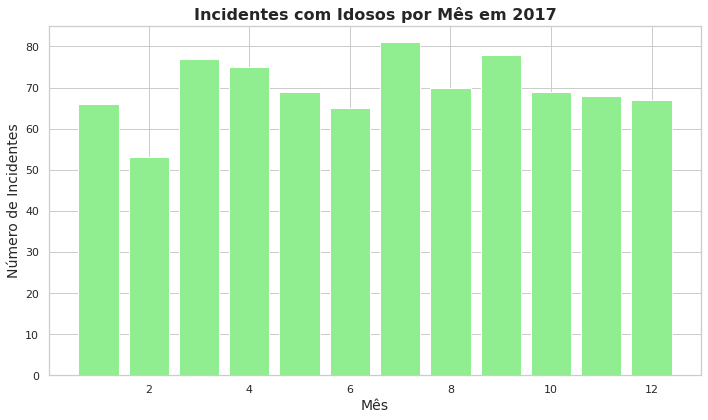

In [105]:
# Visualizar por Gŕafico (gráfico de barras)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(incident.index, incident.values, color='lightgreen')

# Adicionar título e rótulos
plt.title('Incidentes com Idosos por Mês em 2017', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Incidentes', fontsize=14)

# Exibir o gráfico
plt.tight_layout()
plt.show()

#### Resposta

- No ano de 2017 o mês que houve mais incidentes com idosos foi o mês 7.

<br><br>

### 9) Considerando o Operador, qual a distribuição de incidentes ao longo do tempo?

<br>

In [106]:
dados.head(2)

,year,date_of_incident,month_of_incident,season_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,Winter,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,1,Winter,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown


In [110]:
# Visualizando por tabela (contagem de incidentes por mês e ano)
incidentes_por_operador_e_ano = dados.groupby(['year', 'operator']).size().unstack(fill_value=0)
incidentes_por_operador_e_ano

operator,Abellio London,Abellio West,Arriva Kent Thameside,Arriva London North,Arriva London South,Arriva The Shires,Blue Triangle Buses,C T Plus,Docklands Buses,East London,...,Metrobus,Metroline,Metroline West,Quality Line,Selkent,Sullivan Bus & Coach,Sullivan Buses,TGM GROUP,Tower Transit,Uno Buses
year,,,,,,,,,,,,,,,,,,,,,
2015,117,27,73,789,482,126,35,15,34,681,...,246,914,306,0,246,0,0,0,108,0
2016,233,34,34,656,429,107,29,18,19,812,...,246,864,339,0,513,0,2,55,203,0
2017,329,50,0,1026,470,72,117,19,17,578,...,175,940,373,37,573,0,0,6,303,1
2018,284,15,0,737,362,0,100,25,30,331,...,119,739,214,105,476,1,0,0,124,0


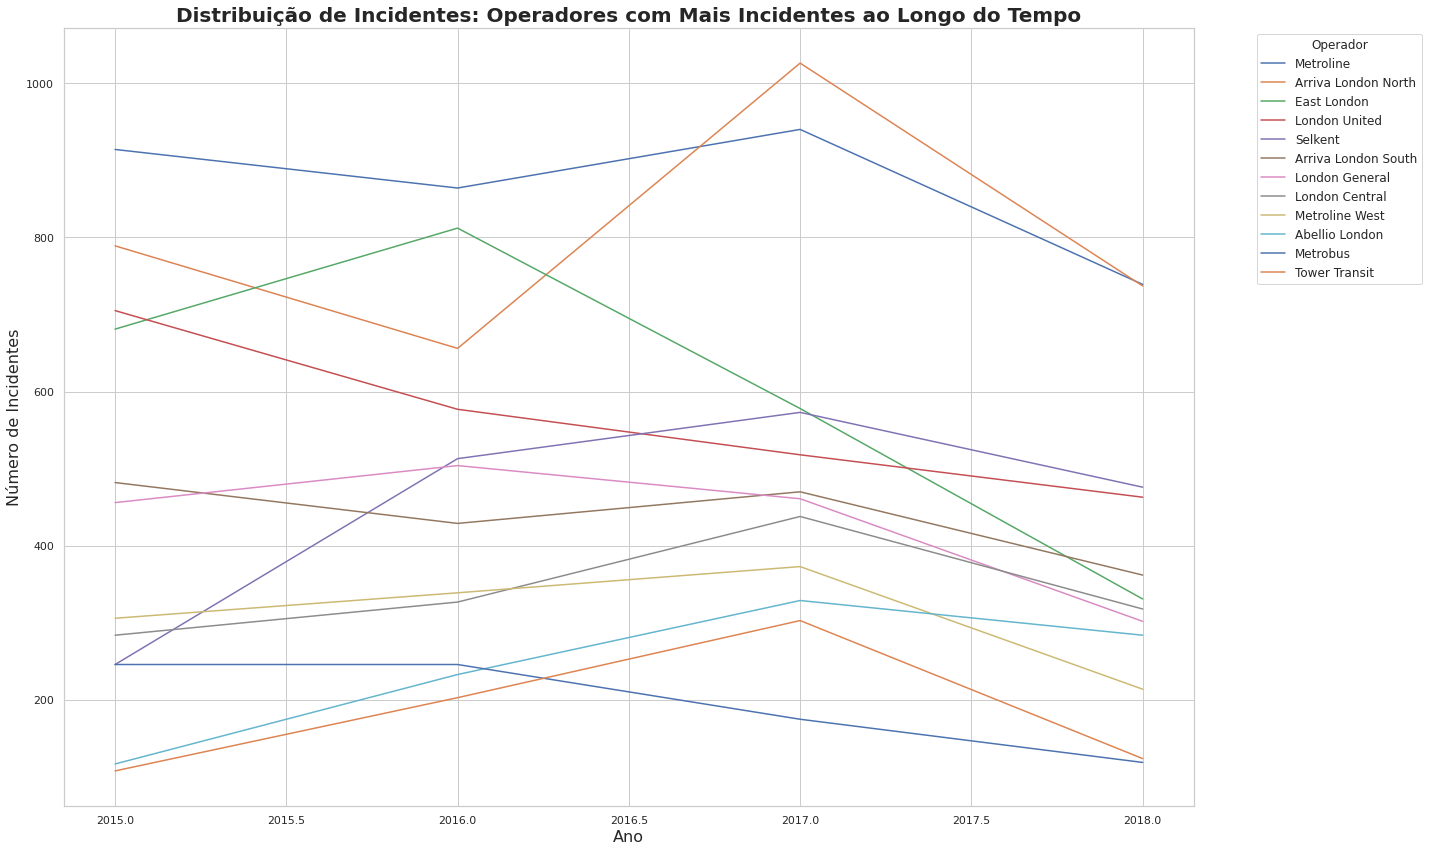

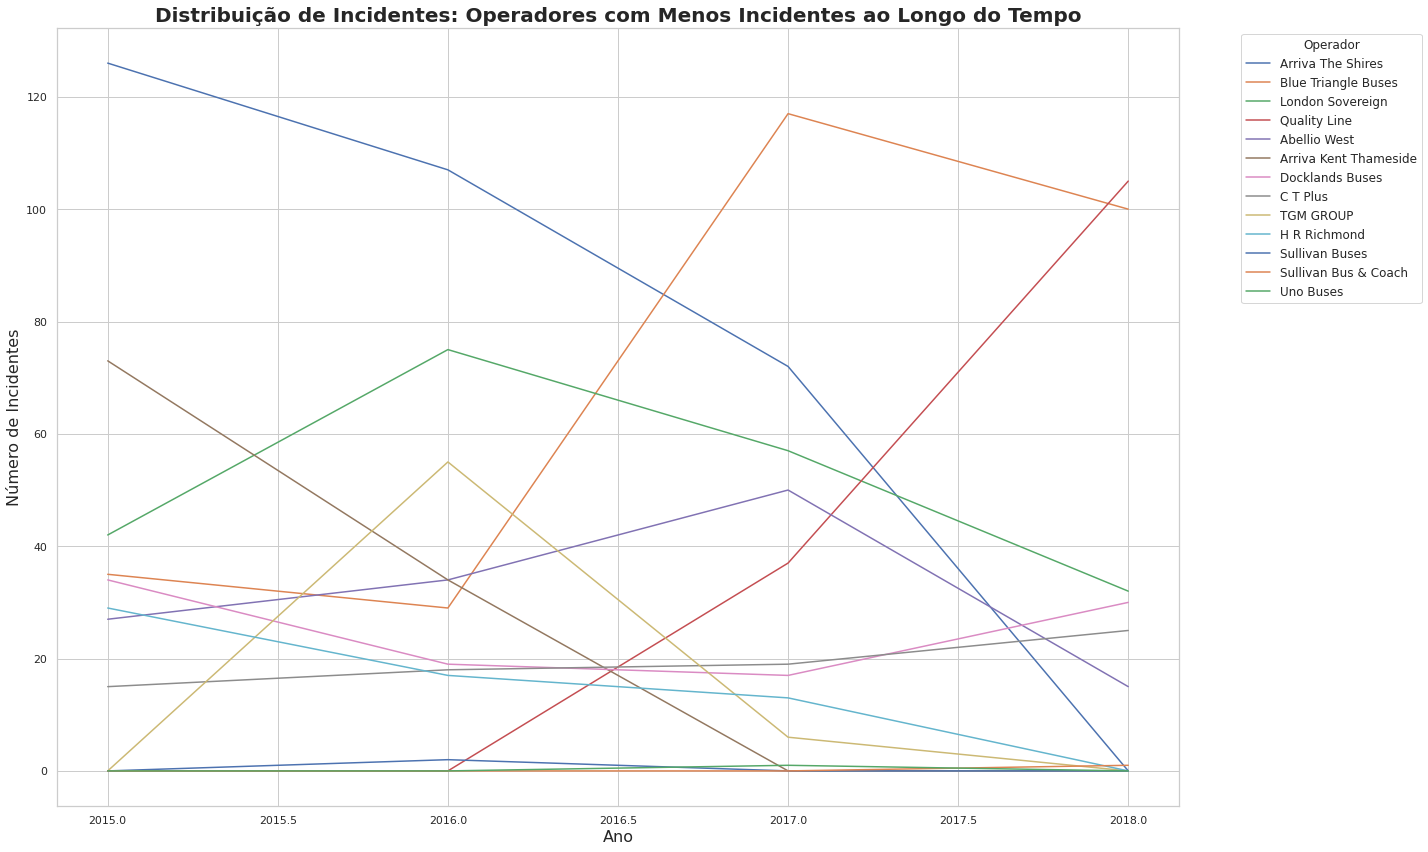

In [117]:
# Visualizando por Gráfico (gráfico de linhas)

# Somar o total de incidentes para cada operador
total_incidentes_por_operador = incidentes_por_operador_e_ano.sum().sort_values(ascending=False)

# Dividir os operadores em duas partes iguais
midpoint = len(total_incidentes_por_operador) // 2
top_operadores = total_incidentes_por_operador.index[:midpoint]
bottom_operadores = total_incidentes_por_operador.index[midpoint:]

# Gráfico para os operadores com mais incidentes
plt.figure(figsize=(20, 12))
for operador in top_operadores:
    plt.plot(incidentes_por_operador_e_ano.index, incidentes_por_operador_e_ano[operador], label=operador)

plt.title('Distribuição de Incidentes: Operadores com Mais Incidentes ao Longo do Tempo', fontsize=20,
          fontweight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Número de Incidentes', fontsize=16)
plt.legend(title='Operador', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico para os operadores com menos incidentes
plt.figure(figsize=(20, 12))
for operador in bottom_operadores:
    plt.plot(incidentes_por_operador_e_ano.index, incidentes_por_operador_e_ano[operador], label=operador)

plt.title('Distribuição de Incidentes: Operadores com Menos Incidentes ao Longo do Tempo', fontsize=20,
          fontweight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Número de Incidentes', fontsize=16)
plt.legend(title='Operador', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

#### Resposta

- A distribuição de incidentes ao longo do tempo revela uma tendência geral de estabilidade ou queda para a maioria dos operadores, com Metroline e Arriva London North destacando-se pelos maiores números de incidentes entre 2015 e 2017.

<br><br>

### 10 Qual o tipo de incidente mais comum com ciclistas?

<br>

In [118]:
dados.head(2)

,year,date_of_incident,month_of_incident,season_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,Winter,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,1,Winter,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown


In [124]:
# Visualizando por Números
incident = dados[(dados['victim_category'] == 'Cyclist')].groupby('incident_event_type').size()
incident

incident_event_type
Collision Incident    256
Onboard Injuries        4
Personal Injury         8
Slip Trip Fall          7
dtype: int64

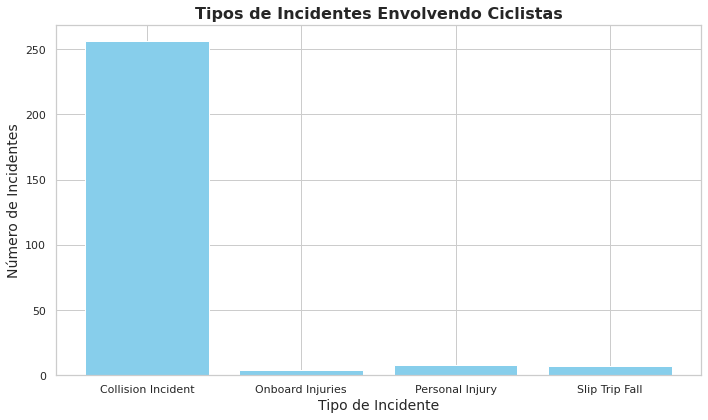

In [125]:
# Visualizar por Gráfico (gráfico de barras)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(incident.index, incident.values, color='skyblue')

# Adicionar título e rótulos
plt.title('Tipos de Incidentes Envolvendo Ciclistas', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Incidente', fontsize=14)
plt.ylabel('Número de Incidentes', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

#### Resposta

- Collision Incident é o tipo de incidente mais comum entre ciclistas, com 256 ocorrências.

<br><br><br>

# Fim!